# Rsi_Score 를 활용한 백테스팅

### buy = 0, sell = 0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install finterstellar


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

     |████████████████████████████████| 109 kB 3.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,751000,-12000,-1.57,765000,765000,745000,107918,8.105619e+10,2.475500e+13,32962679
1,2018-07-03,747000,-4000,-0.53,759000,763000,743000,86305,6.458720e+10,2.462310e+13,32962679
2,2018-07-04,768000,21000,2.81,769000,779000,760000,179939,1.385540e+11,2.531530e+13,32962679
3,2018-07-05,765000,-3000,-0.39,756000,769000,756000,57319,4.364406e+10,2.521640e+13,32962679
4,2018-07-06,749000,-16000,-2.09,755000,758000,746000,81867,6.139346e+10,2.468900e+13,32962679
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,-3500,-0.91,384500,384500,380000,226757,8.646433e+10,6.242070e+13,164049085
862,2021-12-28,384500,4000,1.05,380000,385500,378000,551228,2.106270e+11,6.307690e+13,164049085
863,2021-12-29,382000,-2500,-0.65,389000,389000,382000,352409,1.352920e+11,6.266680e+13,164049085
864,2021-12-30,378500,-3500,-0.92,381000,382000,376000,369314,1.395450e+11,6.209260e+13,164049085


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,33.009709
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000,33.663366


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

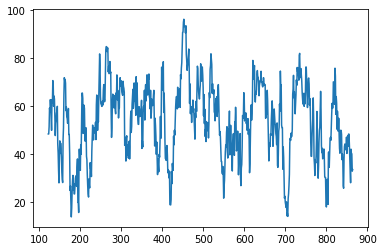

In [ ]:
plt.plot(data['RSI'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

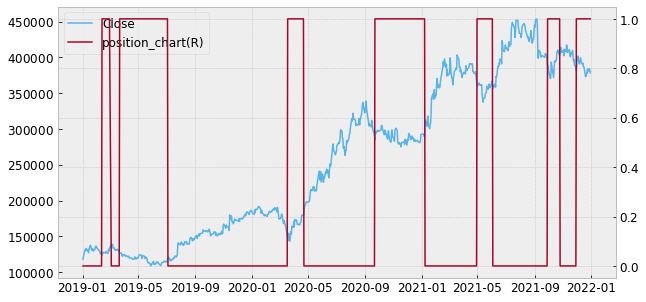

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,48.484848,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,48.484848,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,51.428571,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,59.259259,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,57.831325,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,42.156863,0,buy,ll,1,1.0,1.015873,1.534439,53.44,0.9552,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916,0,buy,ll,1,1.0,0.990885,1.520453,52.05,0.9465,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916,0,buy,ll,1,1.0,1.010512,1.536437,53.64,0.9565,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 14.82%
Accumulated return: 51.25%
Average return: 7.70%
Benchmark return : 220.76%
Number of trades: 7
Number of win: 5
Hit ratio: 71.43%
Investment period: 3.0yrs
Sharpe ratio: 0.57
MDD: -14.57%
Benchmark MDD: -25.33%


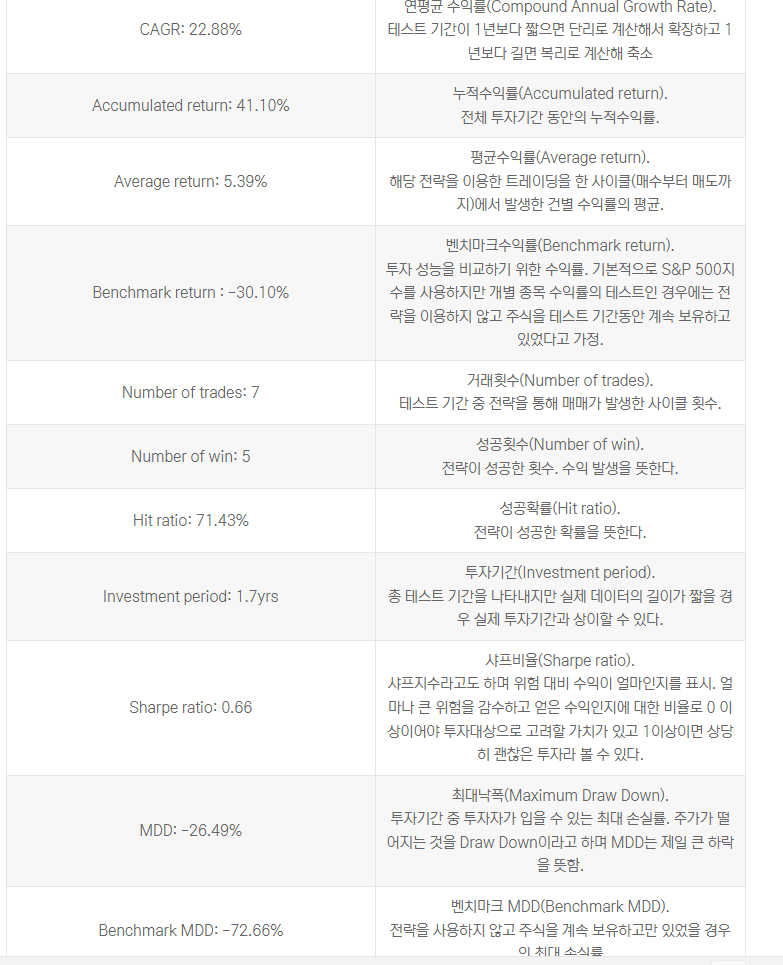

## buy = -0.5, sell = 0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
Rename(data)

,Date,Close,Open,High,Low,Volume
0,2018-07-02,751000,765000,765000,745000,107918
1,2018-07-03,747000,759000,763000,743000,86305
2,2018-07-04,768000,769000,779000,760000,179939
3,2018-07-05,765000,756000,769000,756000,57319
4,2018-07-06,749000,755000,758000,746000,81867
...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757
862,2021-12-28,384500,380000,385500,378000,551228
863,2021-12-29,382000,389000,389000,382000,352409
864,2021-12-30,378500,381000,382000,376000,369314


In [ ]:
EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,33.009709
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000,33.663366


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score
123,2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,48.484848,0
124,2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,48.484848,0
125,2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,51.428571,0
126,2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,59.259259,0
127,2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,57.831325,0
...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,42.156863,0
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916,0
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916,0
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,33.009709,0


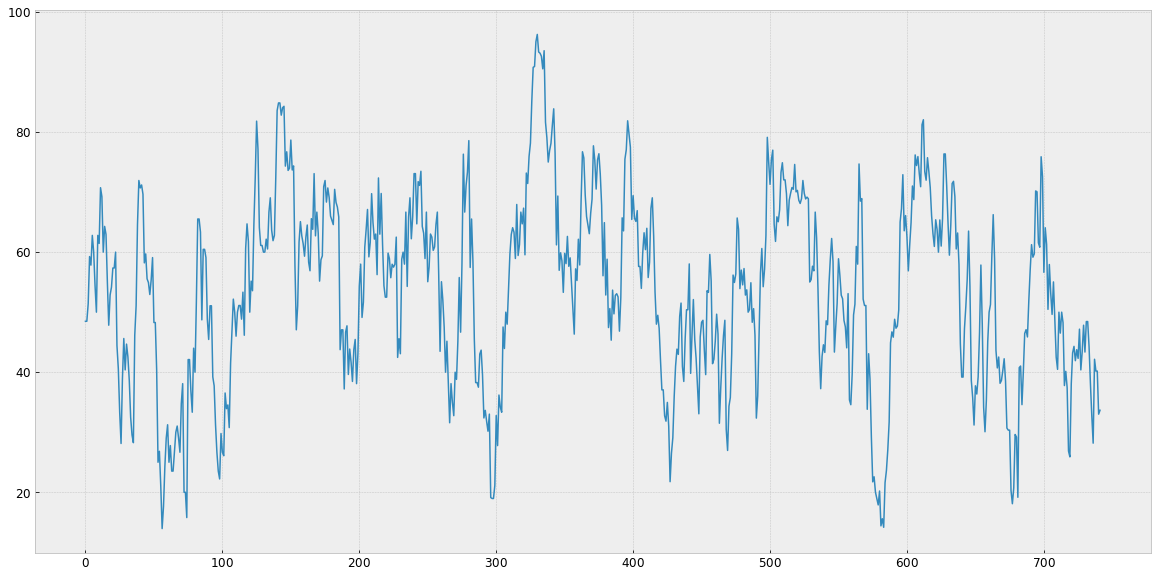

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(range(len(data)),data['RSI'])
plt.show()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy= -0.5, sell= 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

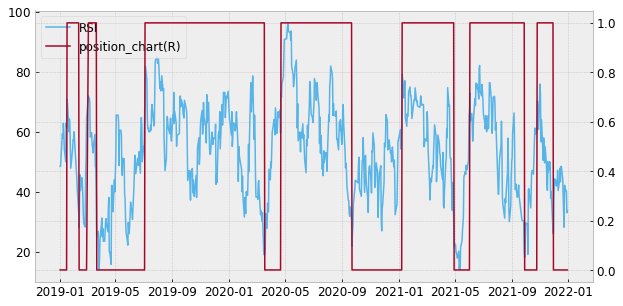

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['RSI'], right='position_chart')
plt.show()

<Figure size 1800x1080 with 0 Axes>

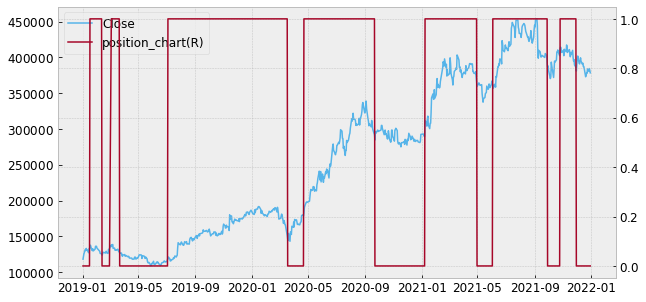

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,48.484848,0,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,48.484848,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,51.428571,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,59.259259,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,57.831325,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,42.156863,0,zero,zz,0,1.0,1.0,1.837715,83.77,0.7872,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916,0,zero,zz,0,1.0,1.0,1.837715,83.77,0.7872,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916,0,zero,zz,0,1.0,1.0,1.837715,83.77,0.7872,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.01)

CAGR: 22.53%
Accumulated return: 83.77%
Average return: 11.04%
Benchmark return : 220.76%
Number of trades: 7
Number of win: 4
Hit ratio: 57.14%
Investment period: 3.0yrs
Sharpe ratio: 0.61
MDD: -23.77%
Benchmark MDD: -25.33%


## buy = 0.5, sell = -0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
Rename(data)

,Date,Close,Open,High,Low,Volume
0,2018-07-02,751000,765000,765000,745000,107918
1,2018-07-03,747000,759000,763000,743000,86305
2,2018-07-04,768000,769000,779000,760000,179939
3,2018-07-05,765000,756000,769000,756000,57319
4,2018-07-06,749000,755000,758000,746000,81867
...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757
862,2021-12-28,384500,380000,385500,378000,551228
863,2021-12-29,382000,389000,389000,382000,352409
864,2021-12-30,378500,381000,382000,376000,369314


In [ ]:
EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,33.009709
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000,33.663366


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score
123,2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,48.484848,0
124,2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,48.484848,0
125,2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,51.428571,0
126,2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,59.259259,0
127,2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,57.831325,0
...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,42.156863,0
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916,0
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916,0
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,33.009709,0


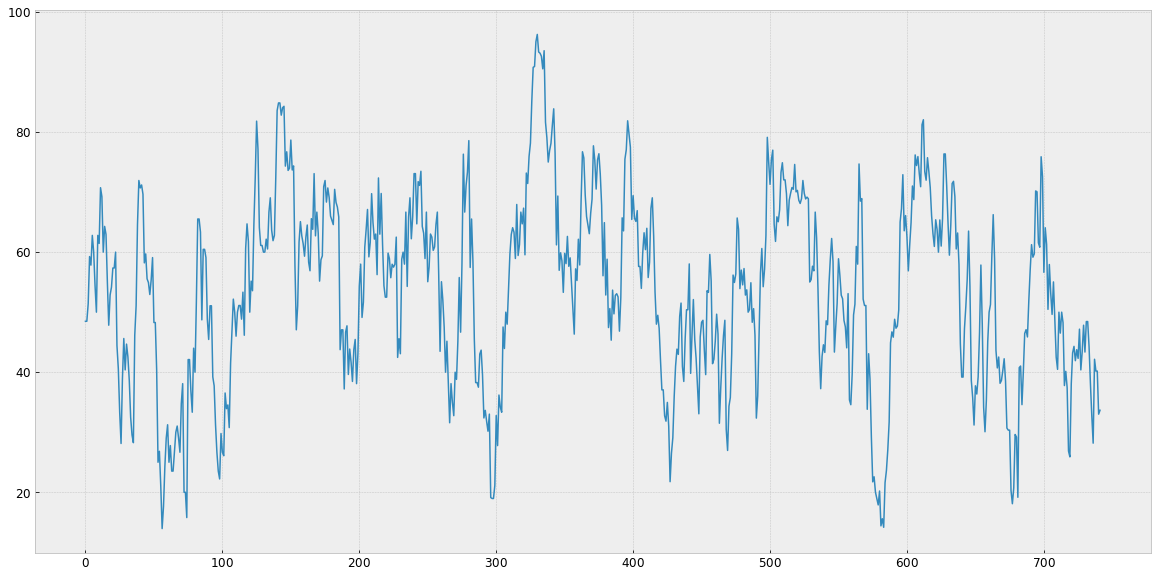

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(range(len(data)),data['RSI'])
plt.show()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy= 0.5, sell= -0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

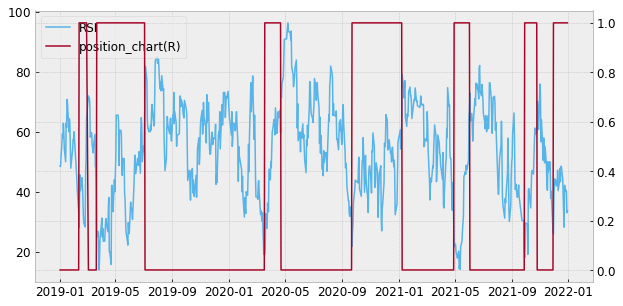

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['RSI'], right='position_chart')
plt.show()

<Figure size 1800x1080 with 0 Axes>

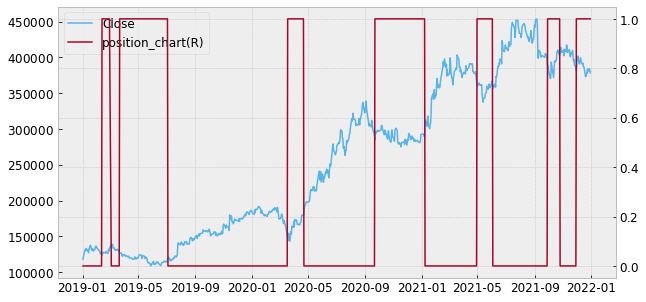

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,48.484848,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,48.484848,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,51.428571,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,59.259259,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,57.831325,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,42.156863,0,buy,ll,1,1.0,1.015873,1.534439,53.44,0.9552,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,40.186916,0,buy,ll,1,1.0,0.990885,1.520453,52.05,0.9465,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,40.186916,0,buy,ll,1,1.0,1.010512,1.536437,53.64,0.9565,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.01)

CAGR: 14.82%
Accumulated return: 51.25%
Average return: 7.70%
Benchmark return : 220.76%
Number of trades: 7
Number of win: 5
Hit ratio: 71.43%
Investment period: 3.0yrs
Sharpe ratio: 0.61
MDD: -14.57%
Benchmark MDD: -25.33%




---



---



# MACD를 활용한 백테스팅

## buy = 0, sell =0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,751000,-12000,-1.57,765000,765000,745000,107918,8.105619e+10,2.475500e+13,32962679
1,2018-07-03,747000,-4000,-0.53,759000,763000,743000,86305,6.458720e+10,2.462310e+13,32962679
2,2018-07-04,768000,21000,2.81,769000,779000,760000,179939,1.385540e+11,2.531530e+13,32962679
3,2018-07-05,765000,-3000,-0.39,756000,769000,756000,57319,4.364406e+10,2.521640e+13,32962679
4,2018-07-06,749000,-16000,-2.09,755000,758000,746000,81867,6.139346e+10,2.468900e+13,32962679
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,-3500,-0.91,384500,384500,380000,226757,8.646433e+10,6.242070e+13,164049085
862,2021-12-28,384500,4000,1.05,380000,385500,378000,551228,2.106270e+11,6.307690e+13,164049085
863,2021-12-29,382000,-2500,-0.65,389000,389000,382000,352409,1.352920e+11,6.266680e+13,164049085
864,2021-12-30,378500,-3500,-0.92,381000,382000,376000,369314,1.395450e+11,6.209260e+13,164049085


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,-5030.022429,-455.375320
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,-5024.042155,23.921094
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,-4762.367291,-4971.707182,209.339891
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000,-4801.023257,-4937.570397,136.547141


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-7775.334382,-10763.882018,2988.547636,0
124,2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-7191.947512,-10049.495117,2857.547605,0
125,2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-6373.716233,-9314.339340,2940.623107,0
126,2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,-5181.384418,-8487.748356,3306.363938,0
127,2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,-4307.832319,-7651.765148,3343.932829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-5617.726936,-4916.178599,-701.548337,-1
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,-5030.022429,-455.375320,-1
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,-5024.042155,23.921094,0
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,-4762.367291,-4971.707182,209.339891,1


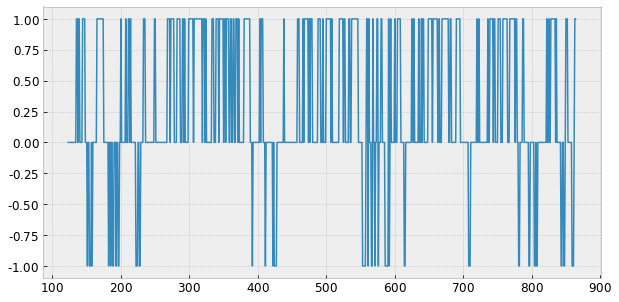

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zl
2021-12-30    ll
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

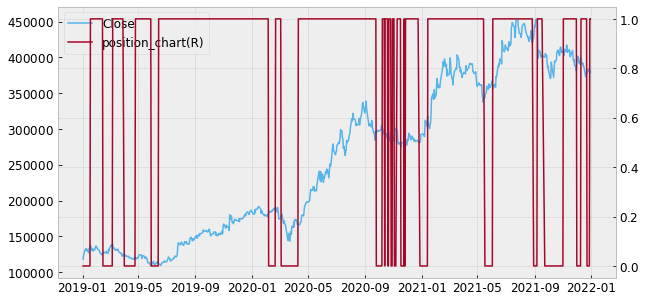

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-7775.334382,...,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-7191.947512,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-6373.716233,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,-5181.384418,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,-4307.832319,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-5617.726936,...,-1,zero,zz,0,1.0,1.000000,1.731505,73.15,0.7356,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,...,-1,zero,zz,0,1.0,1.000000,1.731505,73.15,0.7356,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,...,0,zero,zz,0,1.0,1.000000,1.731505,73.15,0.7356,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 19.75%
Accumulated return: 71.56%
Average return: 5.19%
Benchmark return : 220.76%
Number of trades: 19
Number of win: 4
Hit ratio: 21.05%
Investment period: 3.0yrs
Sharpe ratio: 0.49
MDD: -33.62%
Benchmark MDD: -25.33%


## buy = -0.5, sell = 0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,751000,-12000,-1.57,765000,765000,745000,107918,8.105619e+10,2.475500e+13,32962679
1,2018-07-03,747000,-4000,-0.53,759000,763000,743000,86305,6.458720e+10,2.462310e+13,32962679
2,2018-07-04,768000,21000,2.81,769000,779000,760000,179939,1.385540e+11,2.531530e+13,32962679
3,2018-07-05,765000,-3000,-0.39,756000,769000,756000,57319,4.364406e+10,2.521640e+13,32962679
4,2018-07-06,749000,-16000,-2.09,755000,758000,746000,81867,6.139346e+10,2.468900e+13,32962679
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,-3500,-0.91,384500,384500,380000,226757,8.646433e+10,6.242070e+13,164049085
862,2021-12-28,384500,4000,1.05,380000,385500,378000,551228,2.106270e+11,6.307690e+13,164049085
863,2021-12-29,382000,-2500,-0.65,389000,389000,382000,352409,1.352920e+11,6.266680e+13,164049085
864,2021-12-30,378500,-3500,-0.92,381000,382000,376000,369314,1.395450e+11,6.209260e+13,164049085


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,-5030.022429,-455.375320
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,-5024.042155,23.921094
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,-4762.367291,-4971.707182,209.339891
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000,-4801.023257,-4937.570397,136.547141


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-7775.334382,-10763.882018,2988.547636,0
124,2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-7191.947512,-10049.495117,2857.547605,0
125,2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-6373.716233,-9314.339340,2940.623107,0
126,2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,-5181.384418,-8487.748356,3306.363938,0
127,2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,-4307.832319,-7651.765148,3343.932829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-5617.726936,-4916.178599,-701.548337,-1
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,-5030.022429,-455.375320,-1
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,-5024.042155,23.921094,0
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,-4762.367291,-4971.707182,209.339891,1


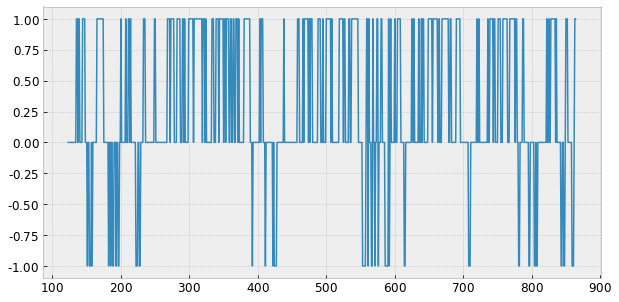

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=-0.5, sell=0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    lz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

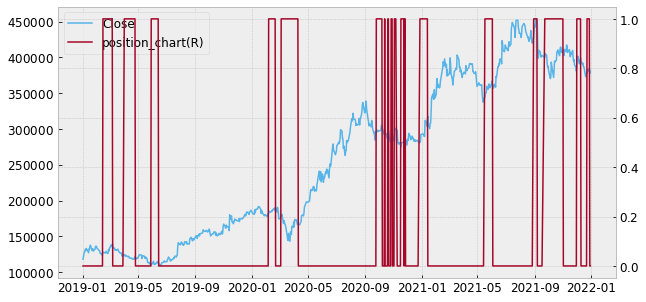

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-7775.334382,...,0,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-7191.947512,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-6373.716233,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,-5181.384418,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,-4307.832319,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-5617.726936,...,-1,buy,ll,1,1.000000,1.015873,1.607255,60.73,0.9981,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,...,-1,buy,ll,1,1.000000,0.990885,1.592605,59.26,0.9890,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,...,0,buy,ll,1,1.000000,1.010512,1.609347,60.93,0.9994,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 16.96%
Accumulated return: 59.87%
Average return: 2.72%
Benchmark return : 220.76%
Number of trades: 18
Number of win: 16
Hit ratio: 88.89%
Investment period: 3.0yrs
Sharpe ratio: 0.70
MDD: -20.99%
Benchmark MDD: -25.33%


## buy = 0.5, sell = -0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,751000,-12000,-1.57,765000,765000,745000,107918,8.105619e+10,2.475500e+13,32962679
1,2018-07-03,747000,-4000,-0.53,759000,763000,743000,86305,6.458720e+10,2.462310e+13,32962679
2,2018-07-04,768000,21000,2.81,769000,779000,760000,179939,1.385540e+11,2.531530e+13,32962679
3,2018-07-05,765000,-3000,-0.39,756000,769000,756000,57319,4.364406e+10,2.521640e+13,32962679
4,2018-07-06,749000,-16000,-2.09,755000,758000,746000,81867,6.139346e+10,2.468900e+13,32962679
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,-3500,-0.91,384500,384500,380000,226757,8.646433e+10,6.242070e+13,164049085
862,2021-12-28,384500,4000,1.05,380000,385500,378000,551228,2.106270e+11,6.307690e+13,164049085
863,2021-12-29,382000,-2500,-0.65,389000,389000,382000,352409,1.352920e+11,6.266680e+13,164049085
864,2021-12-30,378500,-3500,-0.92,381000,382000,376000,369314,1.395450e+11,6.209260e+13,164049085


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,-5030.022429,-455.375320
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,-5024.042155,23.921094
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,-4762.367291,-4971.707182,209.339891
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000,-4801.023257,-4937.570397,136.547141


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-7775.334382,-10763.882018,2988.547636,0
124,2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-7191.947512,-10049.495117,2857.547605,0
125,2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-6373.716233,-9314.339340,2940.623107,0
126,2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,-5181.384418,-8487.748356,3306.363938,0
127,2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,-4307.832319,-7651.765148,3343.932829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-5617.726936,-4916.178599,-701.548337,-1
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,-5030.022429,-455.375320,-1
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,-5024.042155,23.921094,0
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000,-4762.367291,-4971.707182,209.339891,1


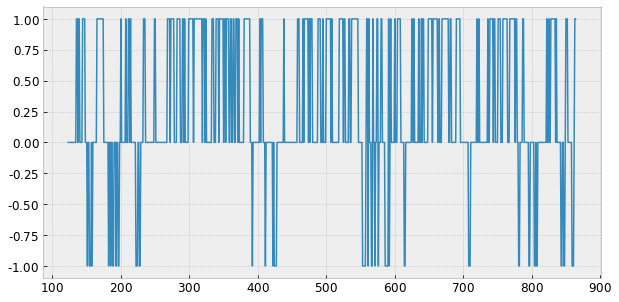

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=-0.5, sell=0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    lz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

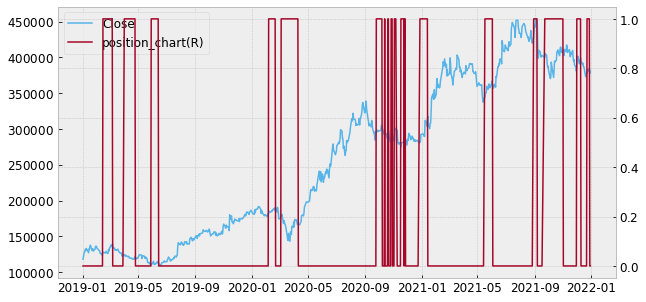

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-7775.334382,...,0,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-7191.947512,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-6373.716233,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,-5181.384418,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,-4307.832319,...,0,zero,zz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-5617.726936,...,-1,buy,ll,1,1.000000,1.015873,1.607255,60.73,0.9981,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-5485.397749,...,-1,buy,ll,1,1.000000,0.990885,1.592605,59.26,0.9890,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-5000.121061,...,0,buy,ll,1,1.000000,1.010512,1.609347,60.93,0.9994,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 16.96%
Accumulated return: 59.87%
Average return: 2.72%
Benchmark return : 220.76%
Number of trades: 18
Number of win: 16
Hit ratio: 88.89%
Investment period: 3.0yrs
Sharpe ratio: 0.70
MDD: -20.99%
Benchmark MDD: -25.33%


# 정분류율을 활용한 백테스팅

### buy = 0, sell =0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,751000,-12000,-1.57,765000,765000,745000,107918,8.105619e+10,2.475500e+13,32962679
1,2018-07-03,747000,-4000,-0.53,759000,763000,743000,86305,6.458720e+10,2.462310e+13,32962679
2,2018-07-04,768000,21000,2.81,769000,779000,760000,179939,1.385540e+11,2.531530e+13,32962679
3,2018-07-05,765000,-3000,-0.39,756000,769000,756000,57319,4.364406e+10,2.521640e+13,32962679
4,2018-07-06,749000,-16000,-2.09,755000,758000,746000,81867,6.139346e+10,2.468900e+13,32962679
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,-3500,-0.91,384500,384500,380000,226757,8.646433e+10,6.242070e+13,164049085
862,2021-12-28,384500,4000,1.05,380000,385500,378000,551228,2.106270e+11,6.307690e+13,164049085
863,2021-12-29,382000,-2500,-0.65,389000,389000,382000,352409,1.352920e+11,6.266680e+13,164049085
864,2021-12-30,378500,-3500,-0.92,381000,382000,376000,369314,1.395450e+11,6.209260e+13,164049085


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000


In [ ]:
def Ma_Minus_back(df):
  box = []
  for i in range(len(df)):
    if (df.iloc[i]['ma5'] > df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma120']):
      box.append(1)
    elif (df.iloc[i]['ma5'] < df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma120']):
      box.append(-1)
    else: 
      box.append(0)
  df['Ma_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)  
  return df

In [ ]:
Ma_Minus_back(data)

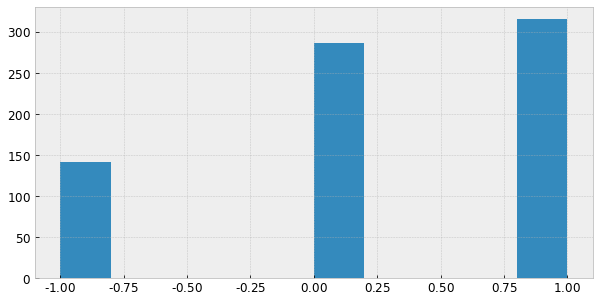

In [ ]:
import matplotlib.pyplot as plt
data['Ma_Score'].hist()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      742 non-null    datetime64[ns]
 1   Close     742 non-null    int64         
 2   Open      742 non-null    int64         
 3   High      742 non-null    int64         
 4   Low       742 non-null    int64         
 5   Volume    742 non-null    int64         
 6   ma5       742 non-null    float64       
 7   ma20      742 non-null    float64       
 8   ma60      742 non-null    float64       
 9   ma120     742 non-null    float64       
 10  Ma_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 69.6 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     742 non-null    int64  
 1   Open      742 non-null    int64  
 2   High      742 non-null    int64  
 3   Low       742 non-null    int64  
 4   Volume    742 non-null    int64  
 5   ma5       742 non-null    float64
 6   ma20      742 non-null    float64
 7   ma60      742 non-null    float64
 8   ma120     742 non-null    float64
 9   Ma_Score  742 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 63.8 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Ma_Score', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

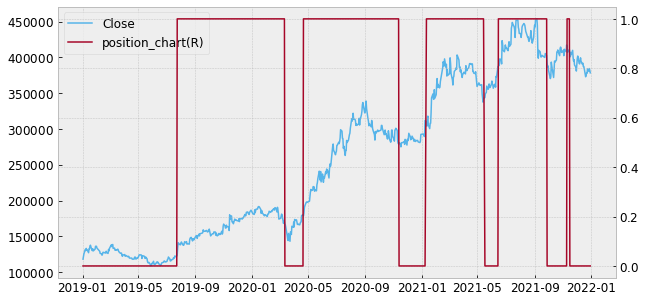

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Ma_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-1,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-1,zero,zz,0,1.0,1.0,2.343113,134.31,0.8456,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-1,zero,zz,0,1.0,1.0,2.343113,134.31,0.8456,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-1,zero,zz,0,1.0,1.0,2.343113,134.31,0.8456,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 32.89%
Accumulated return: 134.31%
Average return: 20.55%
Benchmark return : 220.76%
Number of trades: 5
Number of win: 4
Hit ratio: 80.00%
Investment period: 3.0yrs
Sharpe ratio: 0.89
MDD: -19.40%
Benchmark MDD: -25.33%


## buy = -0.5, sell =0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,751000,-12000,-1.57,765000,765000,745000,107918,8.105619e+10,2.475500e+13,32962679
1,2018-07-03,747000,-4000,-0.53,759000,763000,743000,86305,6.458720e+10,2.462310e+13,32962679
2,2018-07-04,768000,21000,2.81,769000,779000,760000,179939,1.385540e+11,2.531530e+13,32962679
3,2018-07-05,765000,-3000,-0.39,756000,769000,756000,57319,4.364406e+10,2.521640e+13,32962679
4,2018-07-06,749000,-16000,-2.09,755000,758000,746000,81867,6.139346e+10,2.468900e+13,32962679
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,-3500,-0.91,384500,384500,380000,226757,8.646433e+10,6.242070e+13,164049085
862,2021-12-28,384500,4000,1.05,380000,385500,378000,551228,2.106270e+11,6.307690e+13,164049085
863,2021-12-29,382000,-2500,-0.65,389000,389000,382000,352409,1.352920e+11,6.266680e+13,164049085
864,2021-12-30,378500,-3500,-0.92,381000,382000,376000,369314,1.395450e+11,6.209260e+13,164049085


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000


In [ ]:
def Ma_Minus_back(df):
  box = []
  for i in range(len(df)):
    if (df.iloc[i]['ma5'] > df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma120']):
      box.append(1)
    elif (df.iloc[i]['ma5'] < df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma120']):
      box.append(-1)
    else: 
      box.append(0)
  df['Ma_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)  
  return df

In [ ]:
Ma_Minus_back(data)

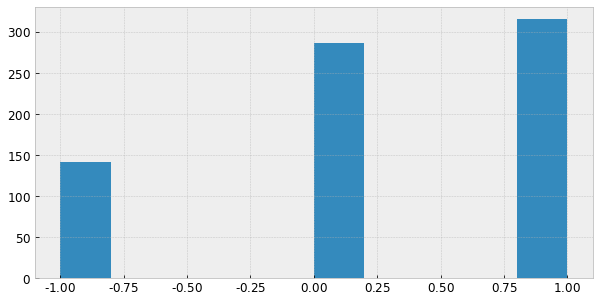

In [ ]:
import matplotlib.pyplot as plt
data['Ma_Score'].hist()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      742 non-null    datetime64[ns]
 1   Close     742 non-null    int64         
 2   Open      742 non-null    int64         
 3   High      742 non-null    int64         
 4   Low       742 non-null    int64         
 5   Volume    742 non-null    int64         
 6   ma5       742 non-null    float64       
 7   ma20      742 non-null    float64       
 8   ma60      742 non-null    float64       
 9   ma120     742 non-null    float64       
 10  Ma_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 69.6 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     742 non-null    int64  
 1   Open      742 non-null    int64  
 2   High      742 non-null    int64  
 3   Low       742 non-null    int64  
 4   Volume    742 non-null    int64  
 5   ma5       742 non-null    float64
 6   ma20      742 non-null    float64
 7   ma60      742 non-null    float64
 8   ma120     742 non-null    float64
 9   Ma_Score  742 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 63.8 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Ma_Score', buy = 0.5, sell = -0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

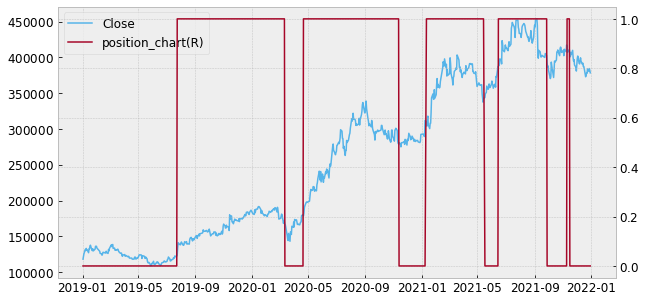

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Ma_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-1,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-1,zero,zz,0,1.0,1.0,2.343113,134.31,0.8456,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,-1,zero,zz,0,1.0,1.0,2.343113,134.31,0.8456,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,-1,zero,zz,0,1.0,1.0,2.343113,134.31,0.8456,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 32.89%
Accumulated return: 134.31%
Average return: 20.55%
Benchmark return : 220.76%
Number of trades: 5
Number of win: 4
Hit ratio: 80.00%
Investment period: 3.0yrs
Sharpe ratio: 0.89
MDD: -19.40%
Benchmark MDD: -25.33%


# 모멘텀을 활용한 백테스팅

### buy = -0.5, sell =0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000


In [ ]:
def Momentom_5_20(data):
  data['Momentom_5'] = data['Close'].pct_change(periods = 5) * 100
  data['Momentom_20'] = data['Close'].pct_change(periods = 20) * 100
  data.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  data['Date'] = pd.to_datetime(data.Date)
  data = data.set_index('Date', inplace = True)
  return data

In [ ]:
Momentom_5_20(data)

In [ ]:
data

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20
Date,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-2.880658,-6.719368
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-0.813008,-3.174603
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,5.462185,1.619433
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,7.346939,5.200000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,6.557377,8.333333
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-0.130039,-1.412067
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,2.010724,-1.552393
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,2.533333,0.918635


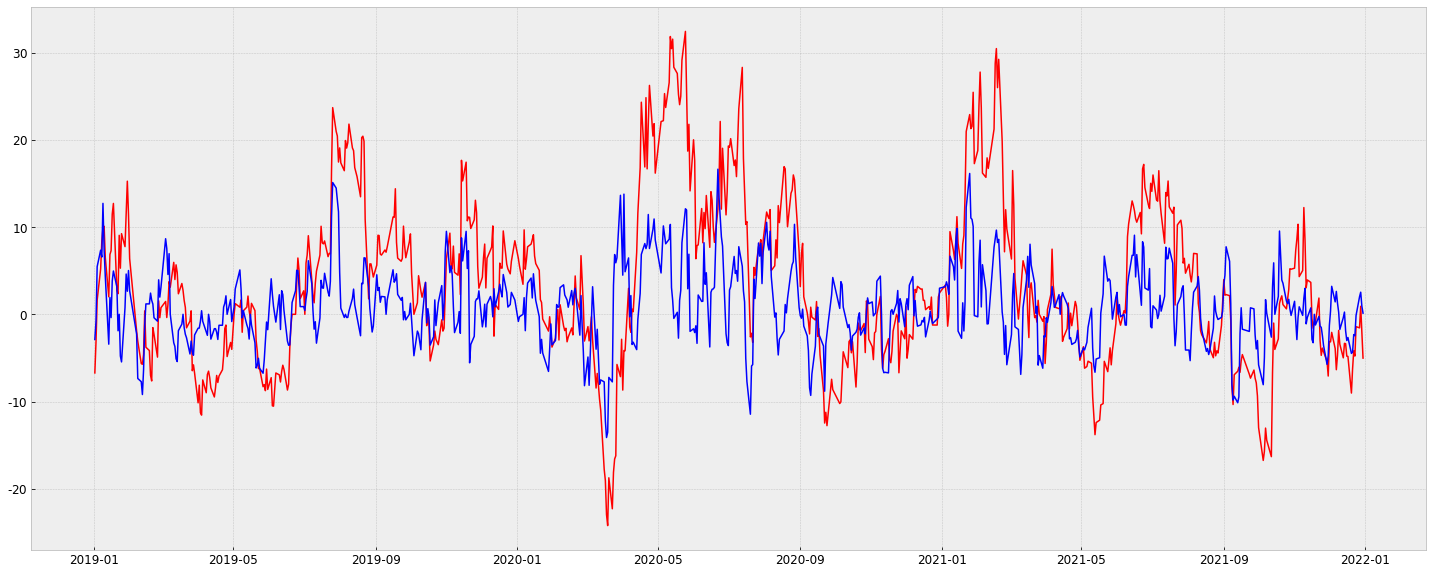

In [ ]:
# 극단적인 양수 비율(과매수)은 매도 타이밍, 음수 비율(과매도)은 매수 타이밍
plt.figure(figsize = (25,10))
plt.plot(data['Momentom_20'], color = 'red')
plt.plot(data['Momentom_5'], color = 'blue')

In [ ]:
# motentom_20 > 0 경우 매도, momentom_20 <0 경우 매수
# signal선 momentom_5를 momentom_20이 상향 돌파 경우 매수 
# signal선 momentom_5를 momentom_20이 하향 돌파 경우 매도 

def Momentom_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if (df.iloc[i]['Momentom_20'] < 0) and (df.iloc[i]['Momentom_20'] < df.iloc[i]['Momentom_5']):
      if (df.iloc[i]['Momentom_20'] < df.iloc[i+1]['Momentom_20']):
        box.append(0)
      else:
        box.append(1)
    elif (df.iloc[i]['Momentom_20'] > df.iloc[i+1]['Momentom_20']):
      box.append(0)
    else :
      box.append(-1)    
  box.append(0)
  df['Momentom_Score'] = box
  return df

In [ ]:
Momentom_Score_back(data)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20,Momentom_Score
Date,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-2.880658,-6.719368,0
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-0.813008,-3.174603,0
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,5.462185,1.619433,-1
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,7.346939,5.200000,-1
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,6.557377,8.333333,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-0.130039,-1.412067,1
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,2.010724,-1.552393,0
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,2.533333,0.918635,0


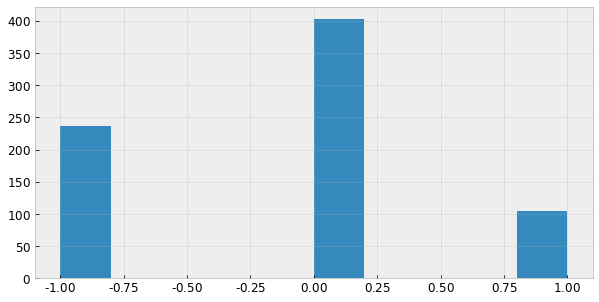

In [ ]:
data['Momentom_Score'].hist()

In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Momentom_Score', buy = -0.5, sell = 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zl
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

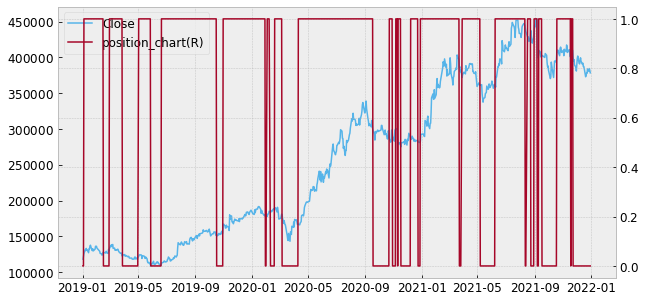

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,...,Momentom_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-2.880658,...,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-0.813008,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,5.462185,...,-1,buy,zl,1,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,7.346939,...,-1,buy,ll,1,1.0,1.047809,1.047809,4.78,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,6.557377,...,-1,buy,ll,1,1.0,0.988593,1.035857,3.59,0.9886,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-0.130039,...,1,zero,zz,0,1.0,1.000000,3.263566,226.36,0.9513,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,2.010724,...,0,zero,zz,0,1.0,1.000000,3.263566,226.36,0.9513,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,2.533333,...,0,zero,zz,0,1.0,1.000000,3.263566,226.36,0.9513,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 48.44%
Accumulated return: 226.36%
Average return: 7.70%
Benchmark return : 220.76%
Number of trades: 20
Number of win: 10
Hit ratio: 50.00%
Investment period: 3.0yrs
Sharpe ratio: 1.31
MDD: -24.38%
Benchmark MDD: -25.33%


### buy = 0, sell =0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('naver_19_21.csv', encoding = 'euc-kr')

In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,751000,765000,765000,745000,107918,NaN,NaN,NaN,NaN
1,2018-07-03,747000,759000,763000,743000,86305,NaN,NaN,NaN,NaN
2,2018-07-04,768000,769000,779000,760000,179939,NaN,NaN,NaN,NaN
3,2018-07-05,765000,756000,769000,756000,57319,NaN,NaN,NaN,NaN
4,2018-07-06,749000,755000,758000,746000,81867,756000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667
862,2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667
863,2021-12-29,382000,389000,389000,382000,352409,381800.0,387525.0,396725.000000,411587.500000
864,2021-12-30,378500,381000,382000,376000,369314,381900.0,386525.0,396816.666667,411262.500000


In [ ]:
def Momentom_5_20(data):
  data['Momentom_5'] = data['Close'].pct_change(periods = 5) * 100
  data['Momentom_20'] = data['Close'].pct_change(periods = 20) * 100
  data.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  data['Date'] = pd.to_datetime(data.Date)
  data = data.set_index('Date', inplace = True)
  return data

In [ ]:
Momentom_5_20(data)

In [ ]:
data

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20
Date,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-2.880658,-6.719368
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-0.813008,-3.174603
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,5.462185,1.619433
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,7.346939,5.200000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,6.557377,8.333333
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-0.130039,-1.412067
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,2.010724,-1.552393
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,2.533333,0.918635


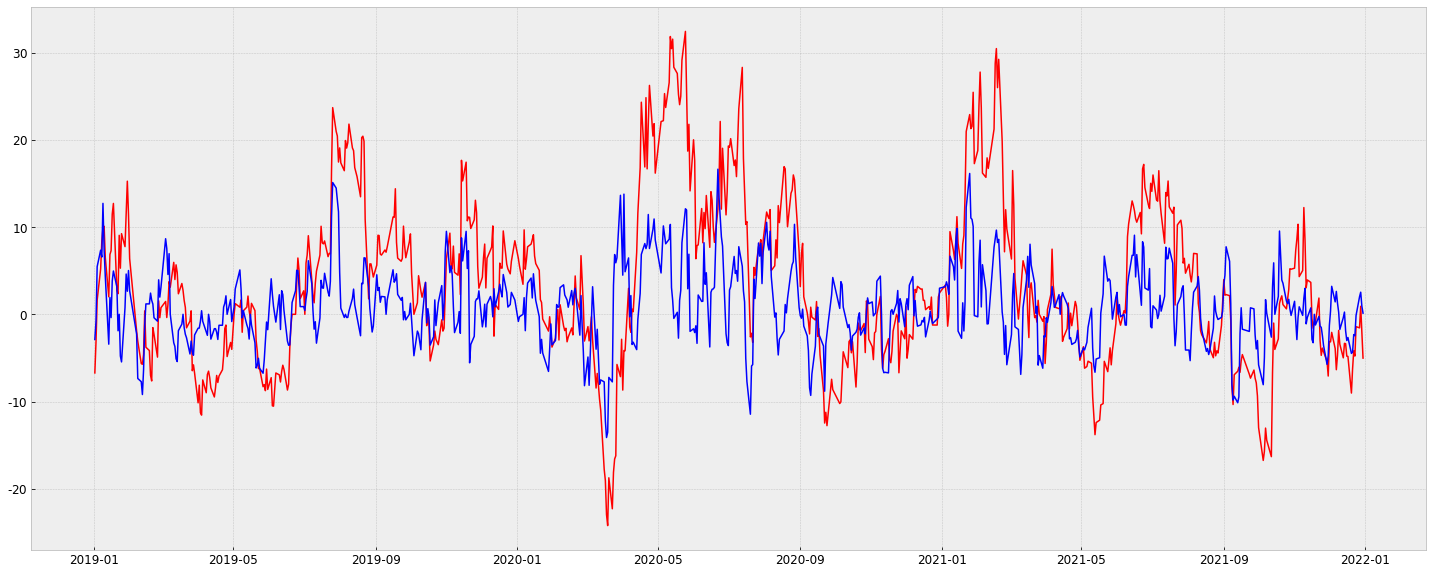

In [ ]:
# 극단적인 양수 비율(과매수)은 매도 타이밍, 음수 비율(과매도)은 매수 타이밍
plt.figure(figsize = (25,10))
plt.plot(data['Momentom_20'], color = 'red')
plt.plot(data['Momentom_5'], color = 'blue')

In [ ]:
# motentom_20 > 0 경우 매도, momentom_20 <0 경우 매수
# signal선 momentom_5를 momentom_20이 상향 돌파 경우 매수 
# signal선 momentom_5를 momentom_20이 하향 돌파 경우 매도 

def Momentom_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if (df.iloc[i]['Momentom_20'] < 0) and (df.iloc[i]['Momentom_20'] < df.iloc[i]['Momentom_5']):
      if (df.iloc[i]['Momentom_20'] < df.iloc[i+1]['Momentom_20']):
        box.append(0)
      else:
        box.append(1)
    elif (df.iloc[i]['Momentom_20'] > df.iloc[i+1]['Momentom_20']):
      box.append(0)
    else :
      box.append(-1)    
  box.append(0)
  df['Momentom_Score'] = box
  return df

In [ ]:
Momentom_Score_back(data)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20,Momentom_Score
Date,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-2.880658,-6.719368,0
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-0.813008,-3.174603,0
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,5.462185,1.619433,-1
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,7.346939,5.200000,-1
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,6.557377,8.333333,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-0.130039,-1.412067,1
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,2.010724,-1.552393,0
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,2.533333,0.918635,0


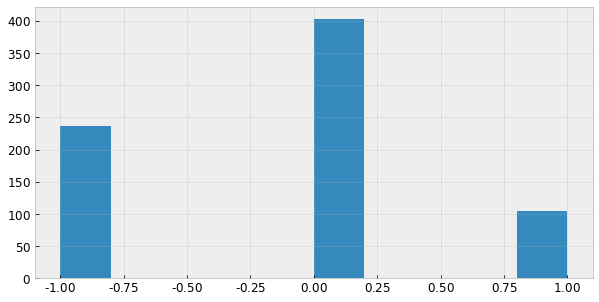

In [ ]:
data['Momentom_Score'].hist()

In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Momentom_Score', buy = 0, sell = 0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

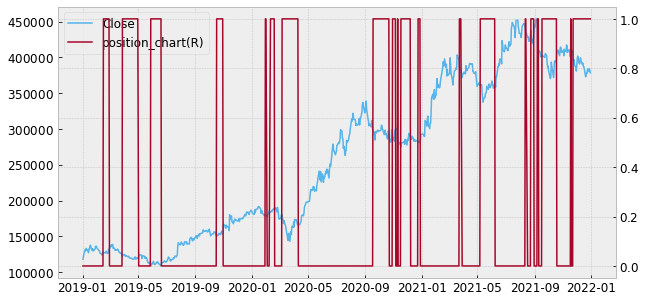

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,...,Momentom_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,118000,121000,122000,117000,356120,120900.0,122700.0,159558.333333,452012.500000,-2.880658,...,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,122000,120000,125000,119000,525020,120700.0,122500.0,149858.333333,446787.500000,-0.813008,...,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-04,125500,123500,126000,122500,520785,122000.0,122600.0,140216.666667,441541.666667,5.462185,...,-1,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,131500,128000,132500,127000,502619,123800.0,122925.0,130675.000000,436304.166667,7.346939,...,-1,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-08,130000,132000,134000,129000,376127,125400.0,123425.0,121108.333333,430979.166667,6.557377,...,-1,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,384000,378000,388000,378000,412695,377700.0,388050.0,396616.666667,412308.333333,-0.130039,...,1,buy,ll,1,1.0,1.015873,0.933902,-6.61,0.7986,0.8458
2021-12-27,380500,384500,384500,380000,226757,379200.0,387750.0,396491.666667,412029.166667,2.010724,...,0,buy,ll,1,1.0,0.990885,0.925390,-7.46,0.7913,0.8381
2021-12-28,384500,380000,385500,378000,551228,381100.0,387925.0,396533.333333,411816.666667,2.533333,...,0,buy,ll,1,1.0,1.010512,0.935118,-6.49,0.7996,0.8469


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -2.73%
Accumulated return: -7.95%
Average return: -0.07%
Benchmark return : 220.76%
Number of trades: 20
Number of win: 10
Hit ratio: 50.00%
Investment period: 3.0yrs
Sharpe ratio: -0.20
MDD: -23.79%
Benchmark MDD: -25.33%
